<h1>Handwritten Number Classification</h1>
<i>Note: data in this notebook is obtained from the MNIST dataset.</i>

_______________________________________________________________________

<b>Goal:</b> given a handwritten number <i>x</i>, where <i>x >= 0</i> and <i>x <= 9</i>, correctly identify which number it is.
_______________________________________________________________________

Import the necessary packages:

In [76]:
import sys, os
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [77]:
# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

As instructed, I will be using the MNIST dataset from keras. The dataset is one consisting of handwritten digits ranging from 0 through 9. The target class is then the correct number that the handwritten value was to represent, also from 0 through 9.

Notice, the dataset has both training and test sets.

In [78]:
digits_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = digits_mnist.load_data()

The set is now in memory, let's have a look at it's type/shape:



In [79]:
print(X_train_full.dtype)
print(X_train_full.shape)

uint8
(60000, 28, 28)


In [80]:
X_test.shape

(10000, 28, 28)

It appears this training set is one of 60,000 handwritten images, with the test set being a smaller 10,000 images in size. Each image is 28 by 28 "pixels" large, and each pixel is a byte (0-255) indicating the pressure of the "ink" at that pixel.

Next, let's break a part of these 60,000 examples of the training set into a validation set, allowing us to skip doing cross validation.

Each pixel will aslo be divided by 255 to normalize it from 0 to 1.

In [81]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Since we are dealing with numbers, the y_train set can be left as is, and does not need to be transcribed into class names.

Let's confirm the shape of our training, validation, and test sets.

In [82]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)


Let's take a look at each of the first 40 numbers to ensure the y_train value makes sense with the X_train handwritten image.

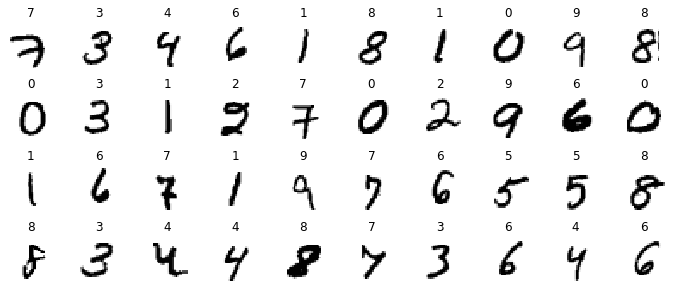

In [83]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Everything is situated for the neural network.

To begin, make a neural network of two hidden layers (with random seeds).
*   We will begin with the first hidden layer being 300 neurons large, and then the second being 100 neurons large. Of course, the output is then 10 neurons large (for the 10 possible outputs). 
*   In this step, notice that we are flattening each image to a 1d array as well.


*Note:* The neural network will be re-done later with different sizes to check the effect size has. The activation function of the hidden layers will also be tested.

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Let's peak at the way this network looks in textual and visual form:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


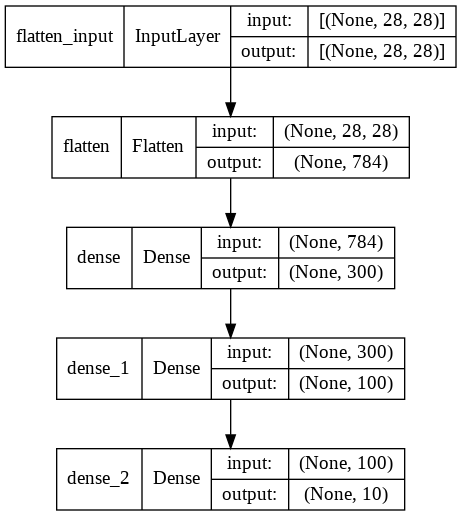

In [85]:
print(model.summary())
keras.utils.plot_model(model, 
                       "handwritten_digits_mnist_model.png",
                       show_shapes=True)

Now we will specify metrics related to the loss function and optimizer to use.

Due to sparse labels, we will use *sparse_categorical_crossentropy*.

We will also use *stochastic gradient descent* with a learning rate of .01 and momentum 0.

*Note:* the learning rate will be changed later to test it's effect.

In [86]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.0),
              metrics=["accuracy"])

Next we will fit the model, using a max of 30 epochs and a batch size of 32.

*Note:* the number of epochs will be tested later to see their effect.

In [87]:
history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6197 - accuracy: 0.8405 - val_loss: 0.3103 - val_accuracy: 0.9120
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2953 - accuracy: 0.9151 - val_loss: 0.2473 - val_accuracy: 0.9302
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2429 - accuracy: 0.9304 - val_loss: 0.2060 - val_accuracy: 0.9424
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2074 - accuracy: 0.9406 - val_loss: 0.1823 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1810 - accuracy: 0.9487 - val_loss: 0.1644 - val_accuracy: 0.9540
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1603 - accuracy: 0.9544 - val_loss: 0.1482 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1431 - accuracy: 0.9597 - val_loss: 0.1366 - val_accuracy:

Note, the final accuracy for this run is 98% on the validation set.

Now we can graph the results of our training:

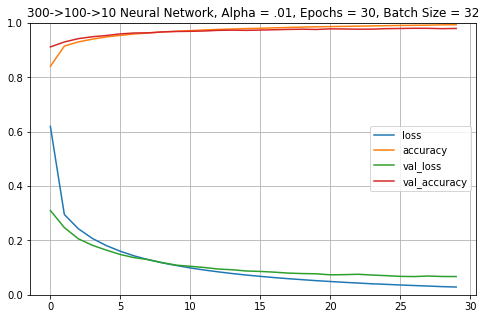

In [88]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.title("300->100->10 Neural Network, Alpha = .01, Epochs = 30, Batch Size = 32")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

First let's try adjusting the learning rate (alpha).

I suspect that raising alpha slightly will better the results.

In [89]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.1,momentum=0.0),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2754 - accuracy: 0.9183 - val_loss: 0.1283 - val_accuracy: 0.9648
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1116 - accuracy: 0.9663 - val_loss: 0.0967 - val_accuracy: 0.9710
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0759 - accuracy: 0.9765 - val_loss: 0.0770 - val_accuracy: 0.9786
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0776 - val_accuracy: 0.9774
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0408 - accuracy: 0.9874 - val_loss: 0.0731 - val_accuracy: 0.9796
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0649 - val_accuracy: 0.9820
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0707 - val_accuracy:

This got our training accuracy to be perfectly accurate. Our val_accuracy is still slightly off, and ended at 98.5%.

For fun, let's try keeping the learning rate at .01 but then doing more epochs (100 instead of 30).


In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.1,momentum=0.0),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    epochs=100,
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2754 - accuracy: 0.9183 - val_loss: 0.1283 - val_accuracy: 0.9648
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1116 - accuracy: 0.9663 - val_loss: 0.0967 - val_accuracy: 0.9710
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0759 - accuracy: 0.9765 - val_loss: 0.0770 - val_accuracy: 0.9786
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0776 - val_accuracy: 0.9774
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0408 - accuracy: 0.9874 - val_loss: 0.0731 - val_accuracy: 0.9796
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0649 - val_accuracy: 0.9820
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0707 - val_ac

There seems to be minimal (if any) benefit in doing this.

As a final learning rate adjustment, let's try a learning rate between the two.

In [91]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.05,momentum=0.0),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    epochs=100,
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3415 - accuracy: 0.9026 - val_loss: 0.1697 - val_accuracy: 0.9540
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1503 - accuracy: 0.9567 - val_loss: 0.1222 - val_accuracy: 0.9626
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1041 - accuracy: 0.9697 - val_loss: 0.0911 - val_accuracy: 0.9752
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0777 - accuracy: 0.9771 - val_loss: 0.0823 - val_accuracy: 0.9764
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0612 - accuracy: 0.9823 - val_loss: 0.0781 - val_accuracy: 0.9772
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0484 - accuracy: 0.9854 - val_loss: 0.0678 - val_accuracy: 0.9808
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0386 - accuracy: 0.9887 - val_loss: 0.0750 - val_ac

Let's try changing the hidden later sizes to see how this affects the outcome

First, let's decrease the first hidden layer down to the size of the second hidden layer.

In [92]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu")) # Make the first layer smaller
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.1,momentum=0.0),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2910 - accuracy: 0.9120 - val_loss: 0.1458 - val_accuracy: 0.9586
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1303 - accuracy: 0.9600 - val_loss: 0.1123 - val_accuracy: 0.9676
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0927 - accuracy: 0.9713 - val_loss: 0.0916 - val_accuracy: 0.9746
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0692 - accuracy: 0.9787 - val_loss: 0.0866 - val_accuracy: 0.9738
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0574 - accuracy: 0.9819 - val_loss: 0.0840 - val_accuracy: 0.9738
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0768 - val_accuracy: 0.9774
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0840 - val_accuracy:

It looks like lowering the number of nodes of the first hidden layer by 200 did not have that large of an affect on the validation set.

Let's try enlarging it (double) the size of the original.

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(600, activation="relu")) # Make the first layer smaller
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.1,momentum=0.0),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2569 - accuracy: 0.9231 - val_loss: 0.1178 - val_accuracy: 0.9652
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1002 - accuracy: 0.9701 - val_loss: 0.0907 - val_accuracy: 0.9744
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0653 - accuracy: 0.9804 - val_loss: 0.0678 - val_accuracy: 0.9806
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0692 - val_accuracy: 0.9790
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0672 - val_accuracy: 0.9800
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0619 - val_accuracy: 0.9828
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.0626 - val_accuracy:

This did not have any effect.

Now, let's try various activation functions for the hidden layers.

First, LeakyReLu:

In [94]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="LeakyReLU"))
model.add(keras.layers.Dense(100, activation="LeakyReLU"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.1,momentum=0.0),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2992 - accuracy: 0.9108 - val_loss: 0.1584 - val_accuracy: 0.9566
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1442 - accuracy: 0.9568 - val_loss: 0.1179 - val_accuracy: 0.9642
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1062 - accuracy: 0.9676 - val_loss: 0.0915 - val_accuracy: 0.9736
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0820 - accuracy: 0.9743 - val_loss: 0.0954 - val_accuracy: 0.9698
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0673 - accuracy: 0.9793 - val_loss: 0.0915 - val_accuracy: 0.9742
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0558 - accuracy: 0.9814 - val_loss: 0.0712 - val_accuracy: 0.9804
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0857 - val_accuracy:

This had slightly worse performance.

Next, PReLU:

In [95]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="PReLU"))
model.add(keras.layers.Dense(100, activation="PReLU"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.1,momentum=0.0),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2741 - accuracy: 0.9184 - val_loss: 0.1277 - val_accuracy: 0.9642
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1087 - accuracy: 0.9679 - val_loss: 0.0935 - val_accuracy: 0.9742
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0730 - accuracy: 0.9773 - val_loss: 0.0760 - val_accuracy: 0.9802
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.0742 - val_accuracy: 0.9786
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0720 - val_accuracy: 0.9812
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0675 - val_accuracy: 0.9840
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0731 - val_accuracy:

No notable improvement here.

Now let's try ELU:

In [96]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="ELU"))
model.add(keras.layers.Dense(100, activation="ELU"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.1,momentum=0.0),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3018 - accuracy: 0.9100 - val_loss: 0.1654 - val_accuracy: 0.9558
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9568 - val_loss: 0.1195 - val_accuracy: 0.9650
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1034 - accuracy: 0.9683 - val_loss: 0.0876 - val_accuracy: 0.9764
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9758 - val_loss: 0.0809 - val_accuracy: 0.9772
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0638 - accuracy: 0.9799 - val_loss: 0.0786 - val_accuracy: 0.9780
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0522 - accuracy: 0.9830 - val_loss: 0.0693 - val_accuracy: 0.9798
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9856 - val_loss: 0.0796 - val_accuracy:

Slightly worse here.

As I suspected, once we hit a test accuracy of 1.0, it would be hard for the neural network to improve itself for the validation set. There is going to be a maximum performance that is dependent on many factors, including the amount and variation of handwriting within the training set.

Let's retrain the neural network back to the standard "relu" with learning rate 0.1:

In [97]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.1,momentum=0.0),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2754 - accuracy: 0.9183 - val_loss: 0.1283 - val_accuracy: 0.9648
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1116 - accuracy: 0.9663 - val_loss: 0.0967 - val_accuracy: 0.9710
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0759 - accuracy: 0.9765 - val_loss: 0.0770 - val_accuracy: 0.9786
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0776 - val_accuracy: 0.9774
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0408 - accuracy: 0.9874 - val_loss: 0.0731 - val_accuracy: 0.9796
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0649 - val_accuracy: 0.9820
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0707 - val_accuracy:

For fun, let's look at that first weird looking "7" to see if it was able to classify it correctly.

In [98]:
X_First = X_test[:1]
y_pred = model.predict(X_First)
pred = np.argmax(y_pred,axis=1)
pred

array([7])

So, it worked for that first weird looking 7 (that could have been easily mistaken for a 3), interesting.

Now for the fun part, evaluate against the test set!

In [99]:
test_result = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9832


**Accuracy Statement:**

The best accuracy I was able to achieve for the test data was 98.32% accuracy.